In [6]:
!pip install matplotlib
!pip install seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     -- ------------------------------------- 10.2/154.1 kB ? eta -:--:--
     -------------------- ------------------ 81.9/154.1 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 154.1/154.1 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pickle
import json
# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
# from classifier import Classifier

In [10]:
df = pd.read_csv("seeds_dataset.txt", header = None)
n = len(df[0][0].split('\t'))
features = [f'feature_{i}' for i in range(n-1)]
for i in range(n-1):
    df[f'feature_{i}'] = df[0].apply(lambda x: x.split('\t')[i])
df['class'] = df[0].apply(lambda x: x.split('\t')[-1])
del df[0]
df = df.apply(pd.to_numeric)
df = df.astype({'class': 'int'})
df['class'] = df['class'].apply(lambda x: x-1)

print(('Shape:'), df.shape)
df.sample(5)

Shape: (210, 8)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,class
158,11.75,13.52,0.8082,5.444,2.678,4.3780,5.310,2
30,13.16,13.82,0.8662,5.454,2.975,0.8551,5.056,0
161,12.02,13.33,0.8503,5.350,2.810,4.2710,5.308,2
115,19.06,16.45,0.8854,6.416,3.719,2.2480,6.163,1
103,19.18,16.63,0.8717,6.369,3.681,3.3570,6.229,1


# Bài 1

Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên

In [11]:
# kiểu dữ liệu của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  210 non-null    float64
 1   feature_1  210 non-null    float64
 2   feature_2  207 non-null    float64
 3   feature_3  210 non-null    float64
 4   feature_4  209 non-null    float64
 5   feature_5  210 non-null    float64
 6   feature_6  206 non-null    float64
 7   class      210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [13]:
# thống kê dữ liệu
df.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,class
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000,210.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529,2.000000
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330,0.818448
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000,1.000000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000,1.000000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000,2.000000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000,3.000000


In [74]:
# các class có trong tập dữ liệu
df['class'].value_counts().keys()

Index([0, 1, 2], dtype='int64', name='class')

# Bài 2
<a id = 'b2'></a>

Trực quan hóa dữ liệu với các biểu đồ `box`, `histogram`, `scatter matrix`, `grid line`.

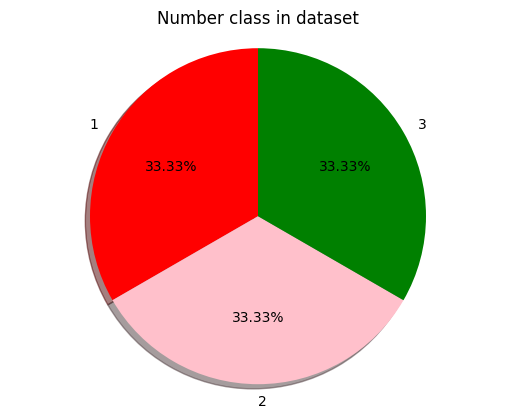

In [13]:
colors=['red', 'pink', 'green']

plt.pie(df['class'].value_counts(), colors=colors, startangle=90, shadow=True, explode=(0, 0, 0), autopct='%1.2f%%', labels=[1, 2, 3])
plt.title('Number class in dataset')
plt.axis('equal')
plt.show()

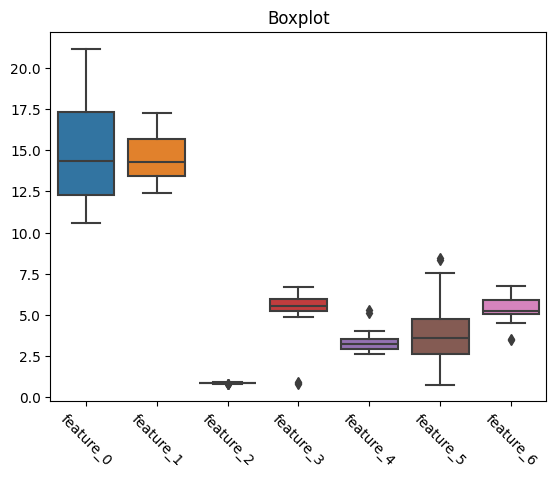

In [21]:
sns.boxplot(data=df[features]);
plt.title('Boxplot')
plt.xticks(rotation=-45);

> features 3, 4, 5, 6 có những điểm outlier.

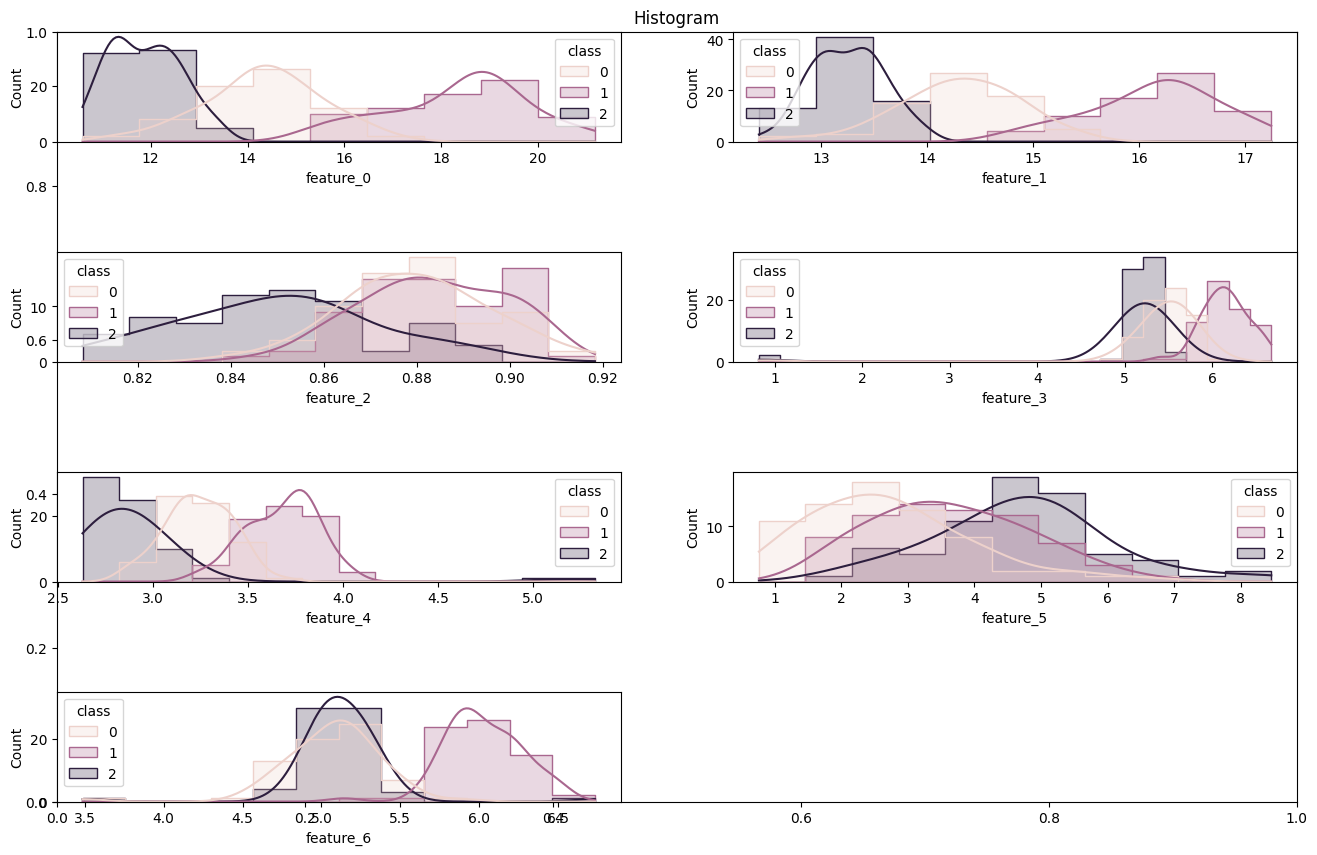

In [22]:
fig = plt.figure(figsize=(16, 10))
plt.title('Histogram')
for i in range(1, n):
    axes = fig.add_subplot(4, 2, i)
    sns.histplot(data=df, x=features[i-1], kde = True, hue = "class", element="step")
    if i == 2 or i == 4:  # Thêm khoảng cách dưới mỗi hàng
        plt.subplots_adjust(hspace=1)

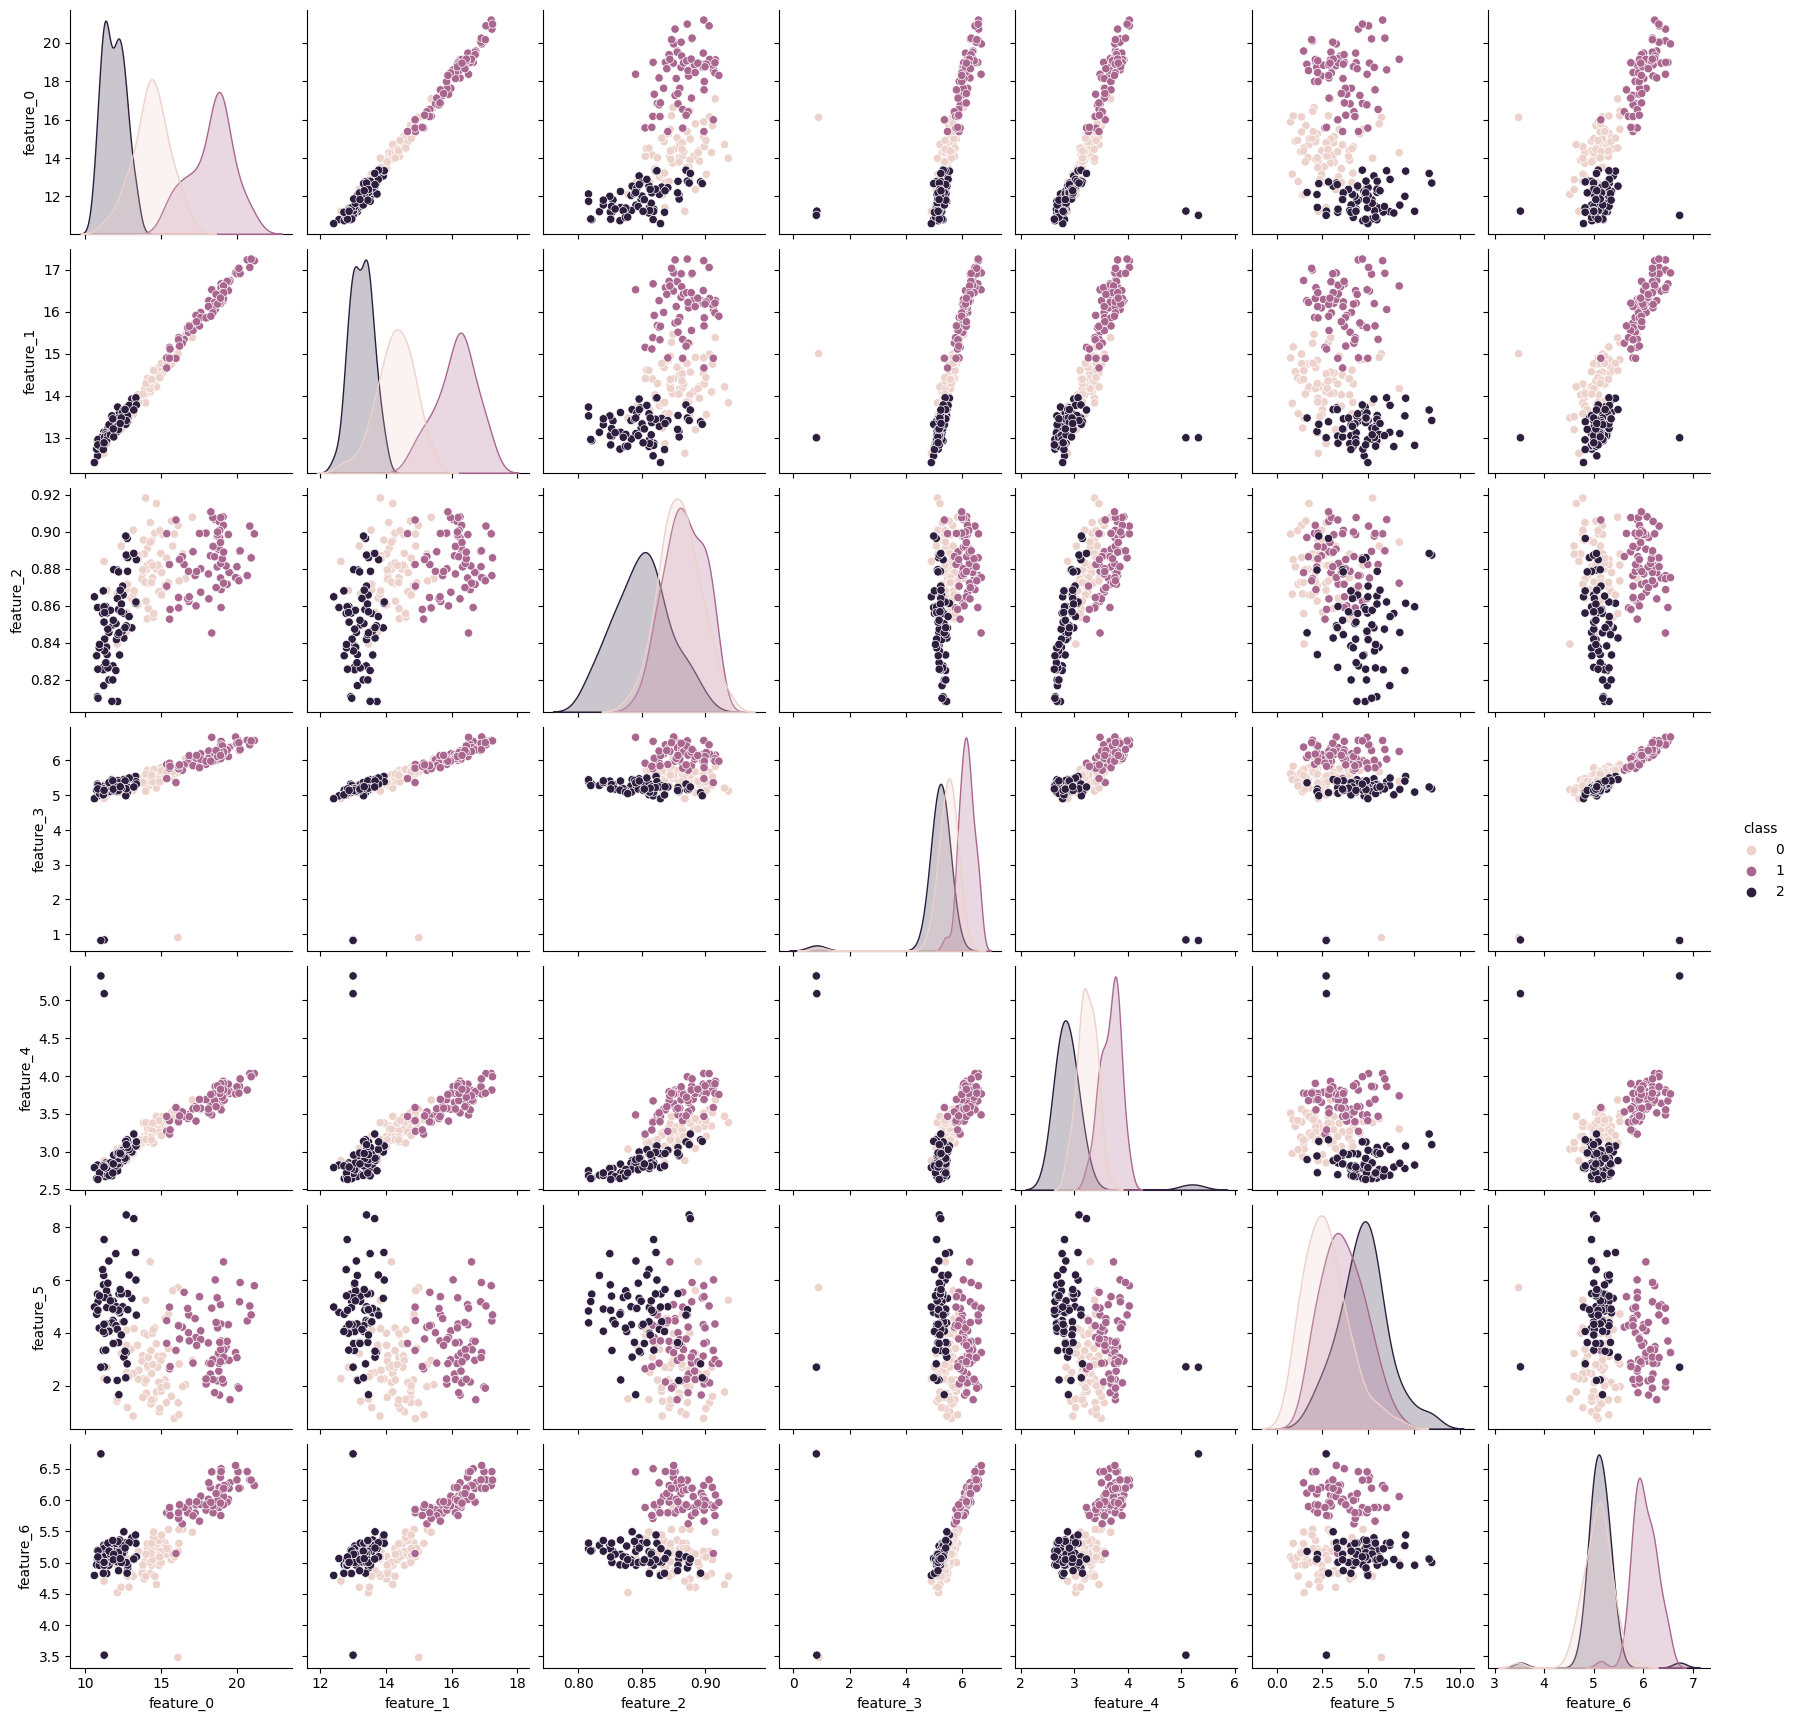

In [23]:
sns.pairplot(df, hue='class', height=2.5);

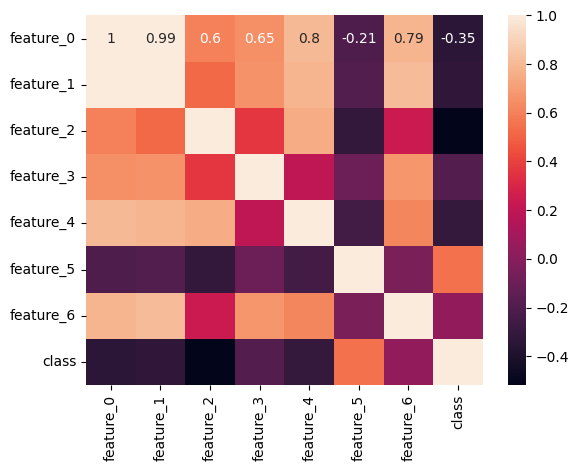

In [25]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True);

# Bài 3
<a id = 'b3'></a>

Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó.

In [26]:
df.isna().sum()

feature_0    0
feature_1    0
feature_2    3
feature_3    0
feature_4    1
feature_5    0
feature_6    4
class        0
dtype: int64

> Dữ liệu ở features 2, 4, 6 bị thiếu, có thể dùng cách điền giá trị trung binhf.

In [27]:
df.fillna(df.mean(), inplace=True)

# Bài 4
<a id = 'b4'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Chia bộ dữ liệu thành $2$ phần `Train/Test` với các tỉ lệ nhất định

In [29]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train[features]
y_train = df_train['class']

X_test = df_test[features]
y_test = df_test['class']

print(('Shape of train set:'), X_train.shape)
print(('Shape of test set:'), X_test.shape)

Shape of train set: (168, 7)
Shape of test set: (42, 7)


# Bài 5
<a id = 'b5'></a>

Đánh giá bộ dữ liệu với giải thuật `KNN` bằng phương pháp `10-Fold` (k-fold)

In [30]:
scores = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=kf)
    scores.append(np.mean(score))

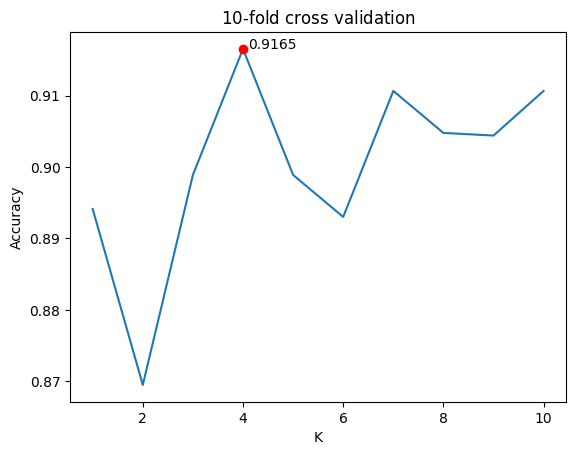

In [31]:
plt.plot(range(1, 11), scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(r'$10$-fold cross validation')
max_sco = max(scores)
plt.plot(scores.index(max_sco)+1, max_sco, 'ro')
plt.annotate(f'{max_sco:.4f}', xy=(scores.index(max_sco), max_sco), xytext=(scores.index(max_sco)+1.1, max_sco))
plt.show()

> Với $k=4$ thì giải thuật KNN bằng phương pháp 10-Fold đạt giá trị tốt nhất $0.9165$.

# Bài 6
<a id = 'b6'></a>

Huấn luyện dữ liệu cho bài toán phân lớp sử dụng $4$ đặc trưng trên với các giải thuật `Decision Tree`, `Bayes`, `SVM` và `XGBoot`.

In [32]:
evaluations = {}

- Decision tree

In [33]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
cm_dt = confusion_matrix(y_test, y_pred_dt)

evaluations['Decision Tree'] = {
    'accuracy': acc_dt,
    'f1_score': f1_dt,
    'confusion_matrix': cm_dt
}

- Bayes

In [34]:
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)
y_pred_bayes = model_bayes.predict(X_test)

acc_bayes = accuracy_score(y_test, y_pred_bayes)
f1_bayes = f1_score(y_test, y_pred_bayes, average='macro')
cm_bayes = confusion_matrix(y_test, y_pred_bayes)

evaluations['Naive Bayes'] = {
    'accuracy': acc_bayes,
    'f1_score': f1_bayes,
    'confusion_matrix': cm_bayes
}

- SVM

In [35]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
cm_svm = confusion_matrix(y_test, y_pred_svm)

evaluations['SVM'] = {
    'accuracy': acc_svm,
    'f1_score': f1_svm,
    'confusion_matrix': cm_svm
}

- XGBoost

In [36]:
model_xgb = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

evaluations['XGBoost'] = {
    'accuracy': acc_xgb,
    'f1_score': f1_xgb,
    'confusion_matrix': cm_xgb
}

# Bài 7

Tính độ đo `F1-score`

In [37]:
for model, evaluation in evaluations.items():
    print(model)
    print(('F1 score:'), evaluation['f1_score'])
    print('-'*80)

Decision Tree
F1 score: 0.9001782531194297
--------------------------------------------------------------------------------
Naive Bayes
F1 score: 0.8242361503231068
--------------------------------------------------------------------------------
SVM
F1 score: 0.8984768318101651
--------------------------------------------------------------------------------
XGBoost
F1 score: 0.9027777777777777
--------------------------------------------------------------------------------


# Bài 8

Tính độ đo `Accuracy`

In [38]:
for model, evaluation in evaluations.items():
    print(model)
    print(('Accuracy:'), evaluation['accuracy'])
    print('-'*80)

Decision Tree
Accuracy: 0.9047619047619048
--------------------------------------------------------------------------------
Naive Bayes
Accuracy: 0.8333333333333334
--------------------------------------------------------------------------------
SVM
Accuracy: 0.9047619047619048
--------------------------------------------------------------------------------
XGBoost
Accuracy: 0.9047619047619048
--------------------------------------------------------------------------------


# Bài 9

Tính độ đo `Confusion Matrix`

In [39]:
for model, evaluation in evaluations.items():
    print(model)
    print(('Confusion matrix:'))
    print(evaluation['confusion_matrix'])
    print('-'*80)

Decision Tree
Confusion matrix:
[[ 9  0  2]
 [ 0 14  0]
 [ 2  0 15]]
--------------------------------------------------------------------------------
Naive Bayes
Confusion matrix:
[[ 8  1  2]
 [ 1 13  0]
 [ 3  0 14]]
--------------------------------------------------------------------------------
SVM
Confusion matrix:
[[ 9  0  2]
 [ 1 13  0]
 [ 1  0 16]]
--------------------------------------------------------------------------------
XGBoost
Confusion matrix:
[[10  0  1]
 [ 0 14  0]
 [ 3  0 14]]
--------------------------------------------------------------------------------


# Bài 10

So sánh kết quả các độ đo `6`, `7`, `8` với các giải thuật học máy ở trên

> Với các kết quả trên có thể thấy mô hình `Decision Tree` và `XGBoost` cho kết quả rất tốt với:
- Accuracy: $0.905$
- F1-score: $0.903$
- Confusion Matrix:
$\begin{bmatrix} 10 & 0 & 1 \\ 0 & 14 & 0 \\ 3 & 0 & 14 \end{bmatrix}$

# Bài 11

Lưu model với giải thuật đạt kết quả tốt nhất

In [40]:
pickle.dump(model_xgb, open('best_model.pkl', 'wb'))

# Bài 12
<a id = 'b12'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Xây dựng ứng dụng với đầu vào là $1$ dữ liệu hay từ $1$ file, in kết quả ra màn hình.

link deploy `streamlit`: https://dllab01.streamlit.app/